Load data into pandas and import libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("all_data_M_2022.xlsx", nrows=10_000)

1. Most Data Scientist Jobs By Location (a)
To identify the regions with the highest number of data scientist jobs, you can filter the OCC_TITLE field for 'Data Scientist' or similar titles and then aggregate by AREA_TITLE or PRIM_STATE.

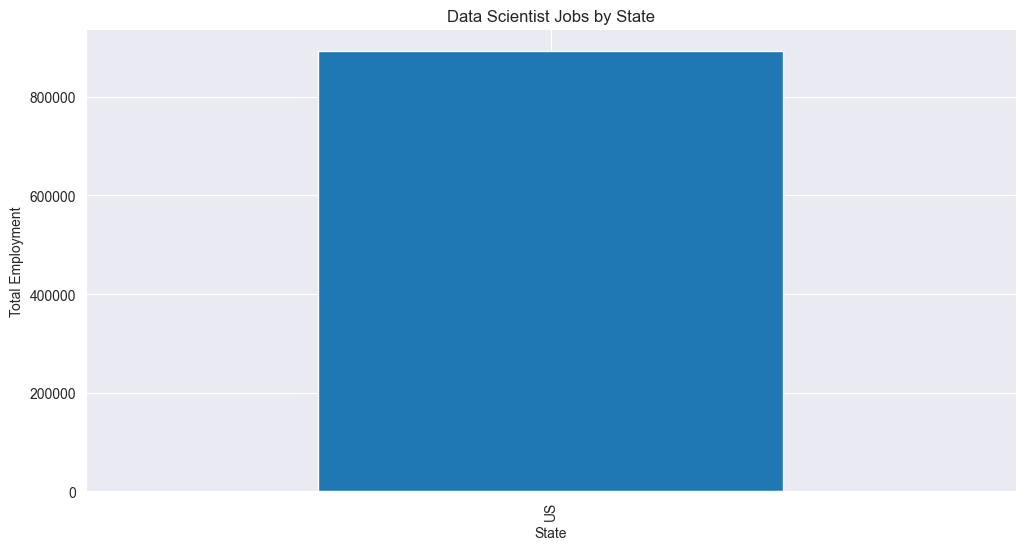

In [10]:
# Filter for Data Scientist jobs
data_scientist_jobs = df[df['OCC_TITLE'].str.contains("Data Scientist", case=False)]

# Group by state or area and sort by total employment
grouped_state = data_scientist_jobs.groupby('PRIM_STATE')['TOT_EMP'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12,6))
grouped_state.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Employment')
plt.title('Data Scientist Jobs by State')
plt.show()

2. Industries Hiring Data Scientists (b)
To identify the industries hiring data scientists, you could group the data by NAICS_TITLE.

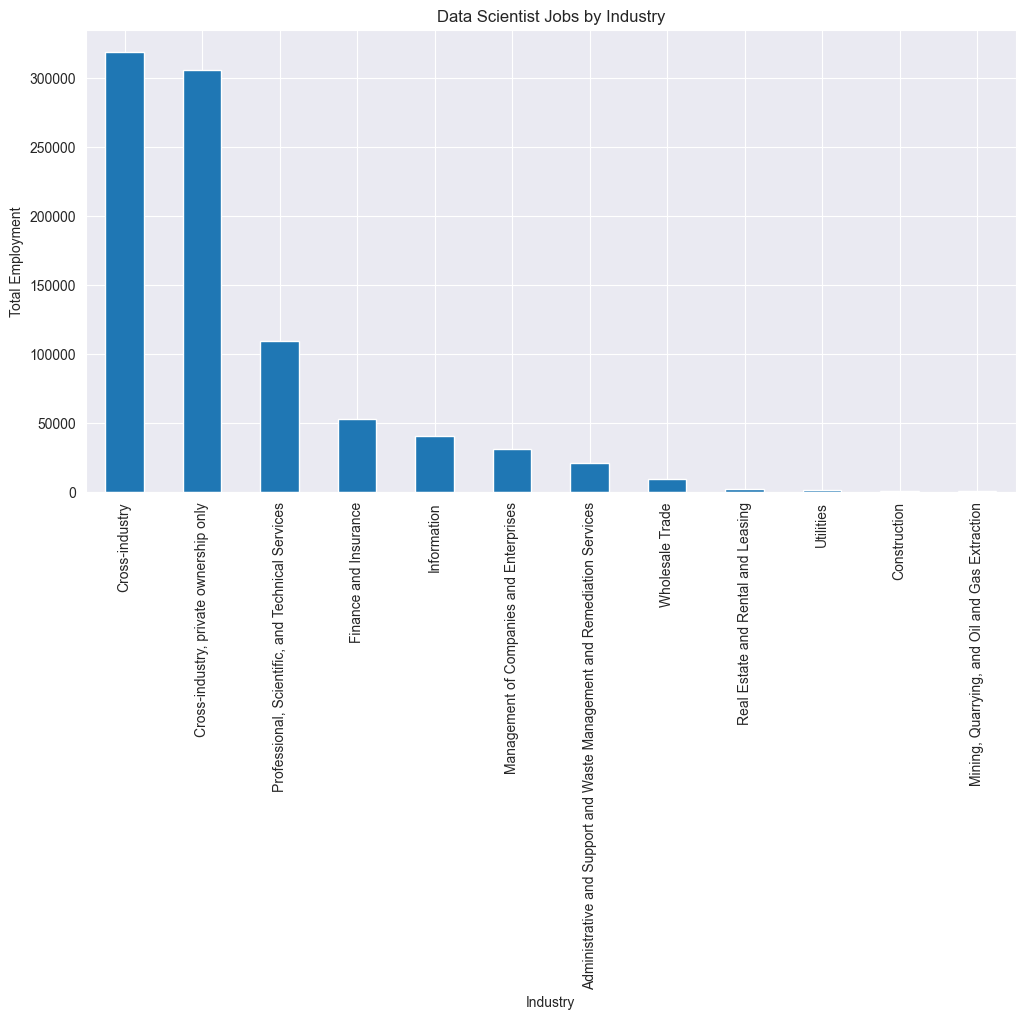

In [11]:
# Group by industry and sort by total employment
grouped_industry = data_scientist_jobs.groupby('NAICS_TITLE')['TOT_EMP'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12,6))
grouped_industry.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Employment')
plt.title('Data Scientist Jobs by Industry')
plt.show()

3. Salary Forecast for Data Scientists (c)
To analyze the salary trends, you can use columns like A_MEAN, A_MEDIAN, A_PCT25, A_PCT75, etc., and group them by AREA_TITLE or PRIM_STATE.

C:\Users\Admin\AppData\Local\Temp\ipykernel_4988\69028699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_scientist_jobs.dropna(subset=['A_MEAN', 'A_MEDIAN', 'A_PCT25', 'A_PCT75'], inplace=True)


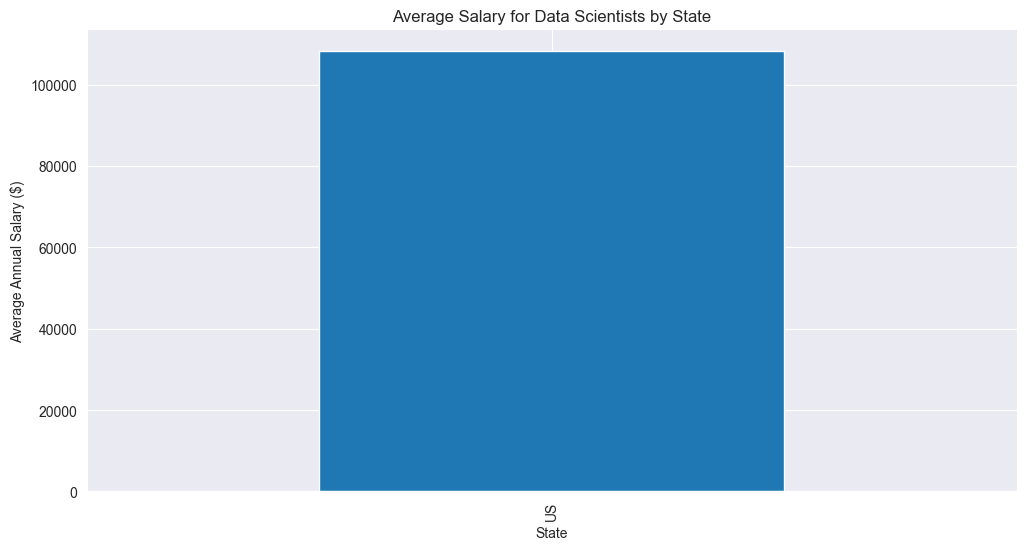

In [12]:
# Convert to numeric
for col in ['A_MEAN', 'A_MEDIAN', 'A_PCT25', 'A_PCT75']:
    data_scientist_jobs.loc[:, col] = pd.to_numeric(data_scientist_jobs.loc[:, col], errors='coerce')

data_scientist_jobs.dropna(subset=['A_MEAN', 'A_MEDIAN', 'A_PCT25', 'A_PCT75'], inplace=True)


# Group and aggregate
try:
    grouped_salary = data_scientist_jobs.groupby('PRIM_STATE').agg({
        'A_MEAN': 'mean',
        'A_MEDIAN': 'median',
        'A_PCT25': 'mean',
        'A_PCT75': 'mean'
    }).sort_values('A_MEAN', ascending=False)

    # Visualization
    grouped_salary['A_MEAN'].plot(kind='bar', figsize=(12,6))
    plt.xlabel('State')
    plt.ylabel('Average Annual Salary ($)')
    plt.title('Average Salary for Data Scientists by State')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
